In [1]:
# Instalar la librería datasets si aún no está
!pip install datasets --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==1

In [2]:
# Importar la función para cargar el dataset
from datasets import load_dataset




In [3]:
# Cargar el subset 'all' con ejecución remota activada
dataset = load_dataset("Hello-SimpleAI/HC3", "all", trust_remote_code=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

HC3.py:   0%|          | 0.00/9.47k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/39.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/24322 [00:00<?, ? examples/s]

In [4]:
# Ver un ejemplo
print(dataset["train"][0])

{'id': '0', 'question': 'Why is every book I hear about a " NY Times # 1 Best Seller " ? ELI5 : Why is every book I hear about a " NY Times # 1 Best Seller " ? Should n\'t there only be one " # 1 " best seller ? Please explain like I\'m five.', 'human_answers': ['Basically there are many categories of " Best Seller " . Replace " Best Seller " by something like " Oscars " and every " best seller " book is basically an " oscar - winning " book . May not have won the " Best film " , but even if you won the best director or best script , you \'re still an " oscar - winning " film . Same thing for best sellers . Also , IIRC the rankings change every week or something like that . Some you might not be best seller one week , but you may be the next week . I guess even if you do n\'t stay there for long , you still achieved the status . Hence , # 1 best seller .', "If you 're hearing about it , it 's because it was a very good or very well - publicized book ( or both ) , and almost every good 

In [5]:
!pip install textstat

# Paso 1: Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import textstat
from wordcloud import WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.6 MB/s eta 0:00:00


In [6]:
nltk.download('punkt')

# Paso 2: Convertir el dataset a pandas DataFrame
df = pd.DataFrame(dataset["train"])

# Paso 3: Ver columnas disponibles
print(df.columns)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Index(['id', 'question', 'human_answers', 'chatgpt_answers', 'source'], dtype='object')


In [7]:
# Convertir a DataFrame
df_raw = pd.DataFrame(dataset["train"])

# Crear nuevo DataFrame con respuestas individuales y etiquetas
rows = []

for _, row in df_raw.iterrows():
    for h_ans in row["human_answers"]:
        rows.append({
            "question": row["question"],
            "answer": h_ans,
            "label": "Human",
            "source": row["source"]
        })
    for g_ans in row["chatgpt_answers"]:
        rows.append({
            "question": row["question"],
            "answer": g_ans,
            "label": "ChatGPT",
            "source": row["source"]
        })

df = pd.DataFrame(rows)

In [8]:
# Longitud de respuestas usando split en lugar de nltk
df["answer_length"] = df["answer"].apply(lambda x: len(x.split()))

# Legibilidad (mantiene textstat)
df["readability"] = df["answer"].apply(lambda x: textstat.flesch_reading_ease(x))

In [9]:
df.sample(3)

,question,answer,label,source,answer_length,readability
6440,LI5 : Can someone explain how someone can embe...,Embezzling can happen many different ways . In...,Human,reddit_eli5,319,57.50
19603,Two - Factor Authentication How do apps and we...,Two-factor authentication (2FA) is a way to ad...,ChatGPT,reddit_eli5,244,65.86
35755,What is the human body doing when yawning ? An...,How come they almost seem to be contagious ?,Human,reddit_eli5,9,80.28


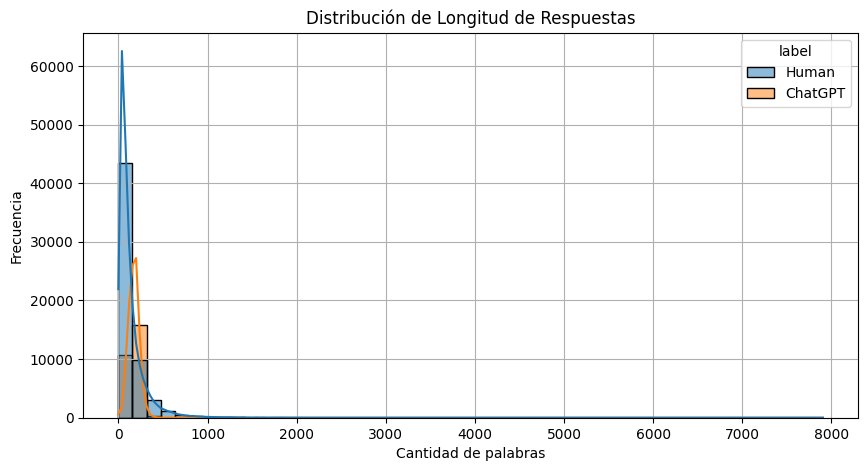

In [10]:
# Distribución de longitud
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='answer_length', hue='label', bins=50, kde=True)
plt.title('Distribución de Longitud de Respuestas')
plt.xlabel('Cantidad de palabras')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

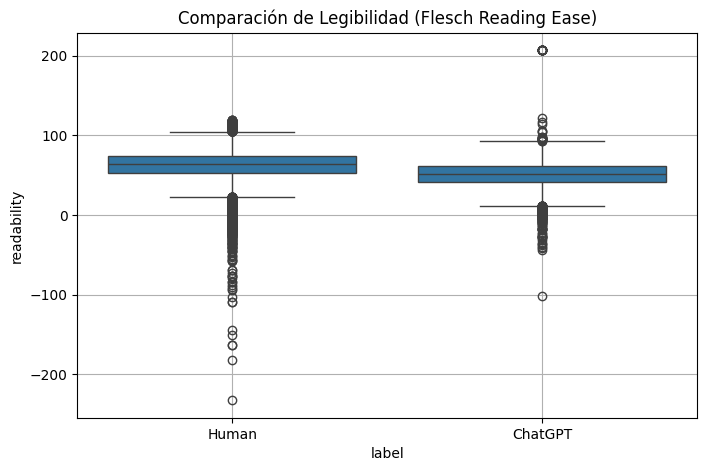

In [11]:
# Boxplot de legibilidad
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='label', y='readability')
plt.title('Comparación de Legibilidad (Flesch Reading Ease)')
plt.grid(True)
plt.show()

In [12]:
# Nubes de palabras
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()



    # Generar nubes
human_texts = df[df['label'] == 'Human']['answer']
chatgpt_texts = df[df['label'] == 'ChatGPT']['answer']

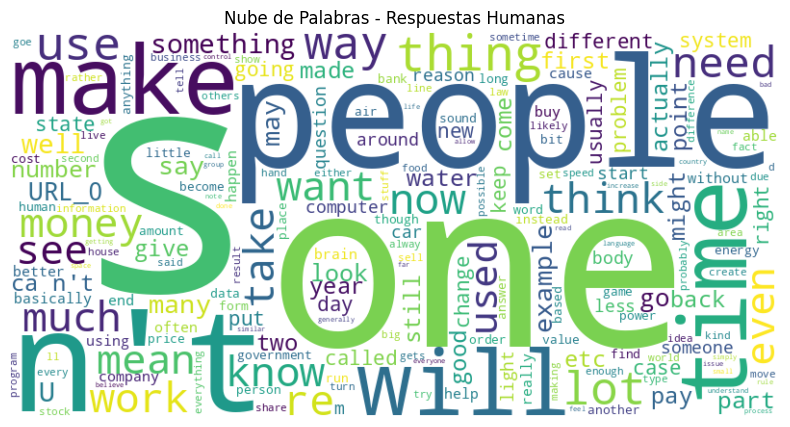

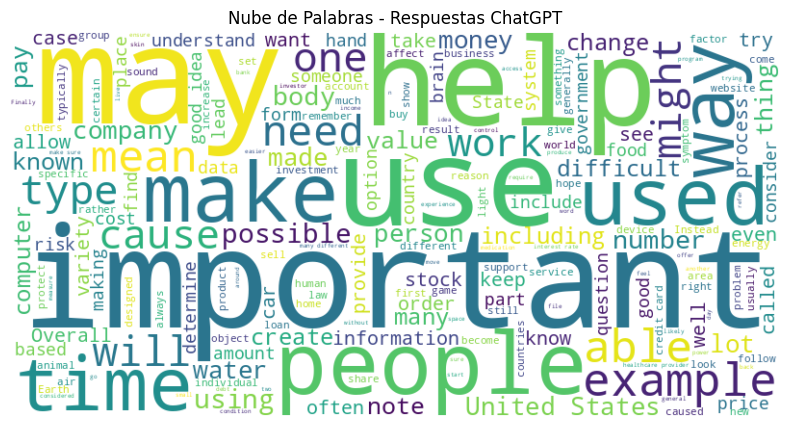

In [13]:
plot_wordcloud(human_texts, "Nube de Palabras - Respuestas Humanas")
plot_wordcloud(chatgpt_texts, "Nube de Palabras - Respuestas ChatGPT")

## Clasificador

In [14]:
# Paso 1: Librerías
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Paso 2: División de datos
X = df["answer"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Paso 3: Vectorización TF-IDF
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [17]:
# Paso 4: Entrenamiento con Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [18]:
# Paso 5: Predicción y evaluación
y_pred = clf.predict(X_test_tfidf)


In [19]:
print("📋 Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

📋 Reporte de clasificación:

              precision    recall  f1-score   support

     ChatGPT       0.90      0.65      0.75      5370
       Human       0.86      0.97      0.91     11720

    accuracy                           0.87     17090
   macro avg       0.88      0.81      0.83     17090
weighted avg       0.87      0.87      0.86     17090



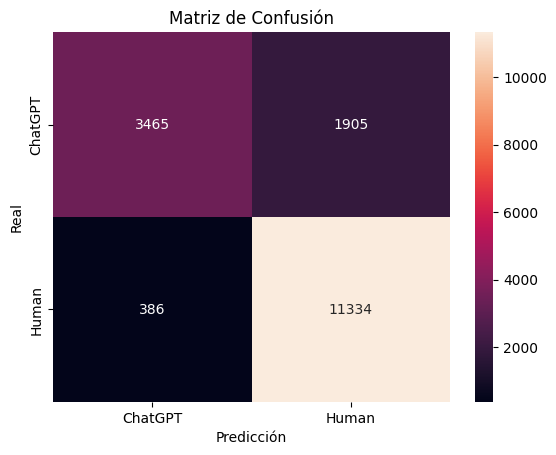

In [20]:
# Paso 6: Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()